<a href="https://colab.research.google.com/github/picazio/COVID19ModelsAndTests/blob/master/R0_vs_exponential.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This code is based on the model described in Chapter 2 of the following book:

https://books.google.ch/books?hl=it&lr=&id=HT0--xXBguQC&oi=fnd&pg=PA27&dq=Anderson+R.M+May+R.M+Infectious+diseases+of+humans:+dynamics+and+control+1991+Oxford+University+Press+Oxford,+UK+&ots=IdodQMXOdl&sig=Q2B_WIEZF9aD5oUujKEkIzEvT_I&redir_esc=y#v=onepage&q&f=false


In [0]:
import pandas as pd
import numpy as np
from datetime import datetime,timedelta
from sklearn.metrics import mean_squared_error
from scipy.optimize import curve_fit
from scipy.optimize import fsolve
import matplotlib.pyplot as plt
%matplotlib inline

#p(t)=p(0)exp(Gt)
#G=(R0-1)/D
#lifespan of the disease 
#R0=2.5*Nvulnerable/Ntot


#function definition
def epidemicshape(x,initInfected,Ntot,Vul,durationOfDisease,initR0) :
    
    b=(initR0*(float(Vul)/float(Ntot))-1.)/durationOfDisease
    infected=initInfected*np.exp(b*x)
    
    return infected 
    


def logistic_model(x,a,b,c):
    return c/(1+np.exp(-(x-b)/a))

#def exponential_model(x,a,b,c):
#    return a*np.exp(b*(x-c))

def exponential_model(x,a,b):
    return a*np.exp(b*x)


def chisqr(obs, exp, error):
    chisqr = 0
    for i in range(len(obs)):
        #chisqr = chisqr + ((obs[i]-exp[i])**2)/(error[i]**2)
        chisqr = chisqr + ((obs[i]-exp[i])**2)/(error[i])
    return chisqr



R=2.5 totale vittime 627632.0 con 0 % di vaccinati 
R=2.0 totale vittime 524060.0 con 0 % di vaccinati 
R=1.5 totale vittime 351353.0 con 0 % di vaccinati 
R=1.25 totale vittime 213131.0 con 0 % di vaccinati 


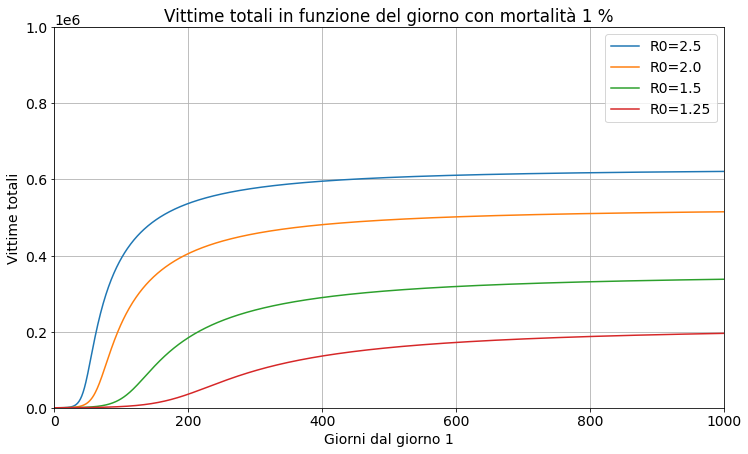

In [2]:
end=365*30
#end=26
c=1100
pred_x = list(range(0,end))

initInfected=6.
durationOfDisease=9.
Ntot=104000000.
Mortality=0.01

Ntot=Mortality*Ntot

fracVs=[0,
        #0.1,
        #0.2,
        #0.3,
        #0.4,
        #0.5,
        #0.6,
        #0.7,
        #0.8,
        #0.9,
        #0.95
       ]
initR0=[
        #14.5,
        2.5,
        #2.25,
        2.0,
        #1.75,
        1.5,
        1.25
       ]

for fracV in fracVs :

    FracVaccinati=fracV
    initialVulnerables=Ntot*(1.-FracVaccinati)
    logis=[]
    #R0=2.5
    

    vulnerables={
        14.5 :initialVulnerables,
        2.5 :initialVulnerables,
        2.25:initialVulnerables,
        2.0 :initialVulnerables,
        1.75:initialVulnerables,
        1.5 :initialVulnerables,
        1.25:initialVulnerables,
        1.0 :initialVulnerables,
        }
    infecteds={
        14.5 :[],
        2.5 :[],
        2.25:[],
        2.0 :[],
        1.75:[],
        1.5 :[],
        1.25:[],
        1.0 :[],
        }
    increment={
        14.5 :[],
        2.5 :[],
        2.25:[],
        2.0 :[],
        1.75:[],
        1.5 :[],
        1.25:[],
        1.0 :[],
        }
    for r0 in initR0 :
      for x in pred_x :
        #if x>40 :
        #    initR0=1.
        #if x>0 :
        #    initR0=initR0-(initR0*0.001)


        r0fun=r0
        if r0==2.5 :
            #logi=logistic_model(x,4.0,55,0.6)
            logi=logistic_model(x,4.0,39,4357.53531167656)
            logis.append(logi)

            #if x>29 : #conteniment effect starts in day 30
            #    r0fun=1.25

        infected=epidemicshape(x,initInfected,Ntot,vulnerables[r0],durationOfDisease,r0fun)
        vulnerables[r0]=vulnerables[r0]-infected
        infecteds[r0].append((initialVulnerables-vulnerables[r0]))
        #infecteds[r0].append((Ntot-vulnerables[r0])/Ntot)
        increment[r0].append(infected)
      print("R="+str(r0)+" totale vittime "+str(round(max(infecteds[r0]),0))+" con "+str(fracV*100)+" % di vaccinati ")

    
    
    #increment.
    plt.rcParams['figure.figsize'] = [12, 7]
    plt.rc('font', size=14)
    for r0 in initR0 :
        #plt.plot(pred_x,infecteds[r0],label="R0="+str(r0)+" % - Vaccinati "+str(fracV*100)+" %")
        plt.plot(pred_x,infecteds[r0],label="R0="+str(r0))
        #plt.plot(pred_x,infecteds[1.00],label="Infected R0=1.00")
        #plt.plot(pred_x,increment,label="Increment",color="blue")
    plt.legend()
    #plt.title("Vittime totali in funzione del giorno con mortalità "+str(Mortality*100)+" %")
    plt.title("Vittime totali in funzione del giorno con mortalità 1 %")
    plt.xlabel("Giorni dal giorno 1")
    plt.ylabel("Vittime totali")
    plt.ylim(0,1000000)
    plt.xlim(0,1000)
    plt.grid()

    #plt.yscale("log")
    #plt.xscale("log")

    plt.savefig('NumeroTotaleVittime_Vs_R0_fracVac'+str(''.join(str(fracV).split('.')))+'.pdf')
    #plt.show()
#print(max(increment))
#print(max(infecteds))
#print(increment.index(max(increment)))
#print(increment)
#print(increment.index(3425.0168268337056))
#print()

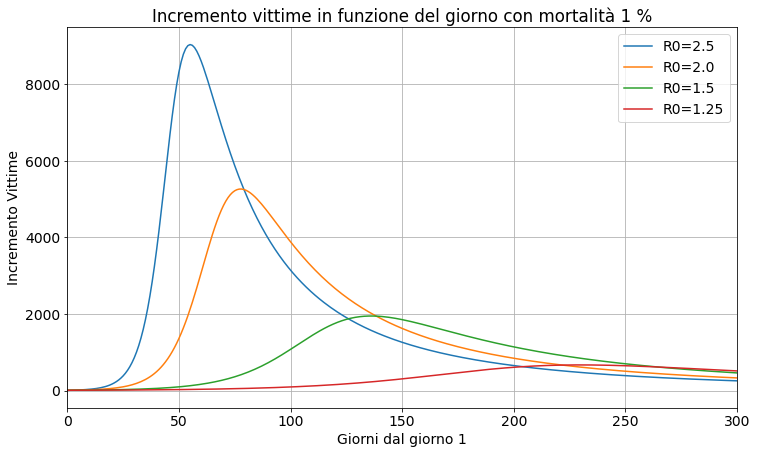

In [3]:
plt.rcParams['figure.figsize'] = [12, 7]
plt.rc('font', size=14)
# Real data
#plt.plot(pred_x,infecteds,label="Infected",color="red")
for r0 in initR0 :
    plt.plot(pred_x,increment[r0],label="R0="+str(r0))
#plt.plot(pred_x,increment[1.00],label="Incremento R0=1.00")

#plt.plot(pred_x,increment,label="Incremento R0=2.5",color="blue")
plt.legend()
plt.title("Incremento vittime in funzione del giorno con mortalità 1 %")
plt.xlabel("Giorni dal giorno 1")
plt.ylabel("Incremento Vittime")
plt.xlim(0,300)
plt.grid()

plt.savefig('IncrementoVittime_Vs_R0.pdf')
plt.show()

Now let's try to implement the fit to the data using the model we just implemented


In [4]:
#Create the df
url = "https://raw.githubusercontent.com/pcm-dpc/COVID-19/master/dati-regioni/dpc-covid19-ita-regioni.csv"
df = pd.read_csv(url)

regione='Lombardia'
#regione='Emilia Romagna'
df=df[df['denominazione_regione']==regione]
df = df.loc[:,['data','deceduti','terapia_intensiva']]
df['poisson_error']=df['deceduti'].apply(lambda x: np.sqrt(x))
df['death_on_ti']=df['deceduti']/df['terapia_intensiva']
FMT = '%Y-%m-%d %H:%M:%S'
date = df['data']
df['data'] = date.map(lambda x : (datetime.strptime(x, FMT) - datetime.strptime("2020-01-01 00:00:00", FMT)).days  )

df.head(40)

,data,deceduti,terapia_intensiva,poisson_error,death_on_ti
9,54,6,19,2.449490,0.315789
30,55,9,25,3.000000,0.360000
51,56,9,25,3.000000,0.360000
72,57,14,41,3.741657,0.341463
93,58,17,47,4.123106,0.361702
114,59,23,80,4.795832,0.287500
135,60,24,106,4.898979,0.226415
156,61,38,127,6.164414,0.299213
177,62,55,167,7.416198,0.329341
198,63,73,209,8.544004,0.349282


We need to define a function that can actually be fit to the data

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26]
[6, 9, 9, 14, 17, 23, 24, 38, 55, 73, 98, 135, 154, 267, 333, 468, 617, 744, 890, 966, 1218, 1420, 1640, 1959, 2168, 2549, 3095]
Fit Sigmoid parameters + errors
[4.53775158865491, 27.100767847691607, 6791.803906540987]
[0.2510016241623903, 1.3465967351371473, 1149.8202254868238]


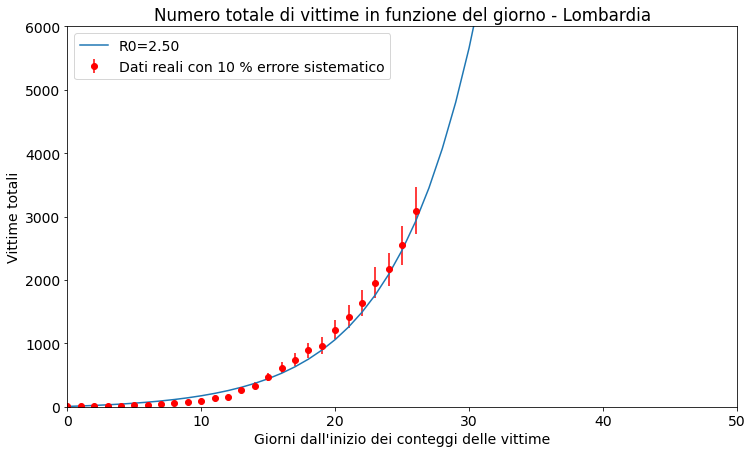

9           NaN
30     0.500000
51     0.000000
72     0.555556
93     0.214286
114    0.352941
135    0.043478
156    0.583333
177    0.447368
198    0.327273
219    0.342466
240    0.377551
261    0.140741
282    0.733766
303    0.247191
324    0.405405
345    0.318376
366    0.205835
387    0.196237
408    0.085393
429    0.260870
450    0.165846
471    0.154930
492    0.194512
513    0.106687
534    0.175738
555    0.214202
Name: deceduti, dtype: float64
[6.0, 13.088151118019596, 21.461767123895697, 31.353924631956033, 43.03993741620798, 56.844999243854545, 73.1532045060303, 92.4181926837191, 115.17570557340514, 142.05839609762188, 173.81328537326772, 211.32233147206716, 255.62664991419297, 307.9550132130971, 369.7573552868562, 442.74411636206787, 528.932384422631, 630.6999183493899, 750.8482718130108, 892.676369041088, 1060.0660029761493, 1257.5808163984912, 1490.580362389912, 1765.3507858801167, 2089.2534716244554, 2470.89259478834, 2920.301792508457, 3449.149022800266, 4070.9569

In [5]:
x = list(df.iloc[:,0]-54)
y = list(df.iloc[:,1])
#yerror = list(df.iloc[:,3])
yerror = list(df.iloc[:,3]+df.iloc[:,1]*0.1)


print(x)
print(y)

#fit_epidemic = curve_fit(epidemic,x,y,p0=[9., 2.5])
fit_oob = curve_fit(logistic_model,x,y,p0=[3.4, 80, 4000.])


#fit_1 = curve_fit(logistic_model,x[:-1],y[:-1],p0=[1, 80, 3.16288051e+04*0.05])
#fit_2 = curve_fit(logistic_model,x[:-2],y[:-2],p0=[1, 80, 3.16288051e+04*0.05])
#fit_3 = curve_fit(logistic_model,x[:-3],y[:-3],p0=[1, 80, 3.16288051e+04*0.05])
#exp_fit = curve_fit(exponential_model,x,y,p0=[1.64409371e-06, 3.10635497e-01, 5.22783872e+00])
exp_fit = curve_fit(exponential_model,x[:],y[:],p0=[1.64409371e-06, 3.10635497e-01])

print("Fit Sigmoid parameters + errors")
parameters=[fit_oob[0][i] for i in [0,1,2]]
errors = [np.sqrt(fit_oob[1][i][i]) for i in [0,1,2]]
print(parameters)
print(errors)







sol=95
c=1100
#pred_x = list(range(max(x),sol))
plt.rcParams['figure.figsize'] = [12, 7]
plt.rc('font', size=14)
# Real data
#plt.scatter(x,y,label="Real data",color="red")
plt.errorbar(x,y,yerr=yerror,label="Dati reali con 10 % errore sistematico",color="red",fmt='o')
# Predicted logistic curve
#plt.plot(x+pred_x, [logistic_model(i,fit_oob[0][0],fit_oob[0][1],fit_oob[0][2]) for i in x+pred_x], label="Logistica oggi" )
#plt.plot(x+pred_x, [exponential_model(i,exp_fit[0][0],exp_fit[0][1]) for i in x+pred_x], label="Esponenziale oggi" )
plt.plot(pred_x,infecteds[2.50],label="R0=2.50")

plt.legend()
plt.title("Numero totale di vittime in funzione del giorno - "+regione)
plt.xlabel("Giorni dall'inizio dei conteggi delle vittime")
plt.ylabel("Vittime totali")
plt.ylim(0,6000)
plt.xlim(0,50)
plt.savefig('R02p5_vs_realData.pdf')
plt.show()


print(df['deceduti'].pct_change())
print(infecteds[2.50][:30])
